In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow import keras

In [0]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
import io

In [0]:
df = drive.CreateFile({'id':'1JjFjg76_mf8TvwTVyPZUx3OKSHhx8BnW'})
df.GetContentFile('d2c.xlsx')

In [0]:
df = pd.read_excel('d2c.xlsx')

In [7]:
df.head(20)

,ID,Default,Checking_amount,Term,Credit_score,Gender,Marital_status,Car_loan,Personal_loan,Home_loan,Education_loan,Emp_status,Amount,Saving_amount,Emp_duration,Age,No_of_credit_acc
0,101,No,988.0,15.0,796.0,Female,Single,Yes,No,No,No,employed,1536.0,3455,12.0,38.0,1.0
1,102,No,458.0,15.0,813.0,Female,Single,Yes,No,No,No,employed,947.0,3600,25.0,36.0,1.0
2,103,No,158.0,14.0,756.0,Female,Single,No,Yes,No,No,employed,1678.0,3093,43.0,34.0,1.0
3,104,Yes,300.0,25.0,737.0,Female,Single,No,No,No,Yes,employed,1804.0,2449,0.0,29.0,1.0
4,105,Yes,63.0,24.0,662.0,Female,Single,No,No,No,Yes,unemployed,1184.0,2867,4.0,30.0,1.0
5,106,No,1071.0,20.0,828.0,Male,Married,Yes,No,No,No,employed,475.0,3282,12.0,32.0,2.0
6,107,No,-192.0,13.0,856.0,Male,Single,Yes,No,No,No,employed,626.0,3398,11.0,38.0,1.0
7,108,No,172.0,16.0,763.0,Female,Single,Yes,No,No,No,employed,1224.0,3022,12.0,36.0,1.0
8,109,No,585.0,20.0,778.0,Female,Single,Yes,No,No,No,unemployed,1162.0,3475,12.0,36.0,1.0
9,110,Yes,189.0,19.0,649.0,Male,Married,Yes,No,No,No,employed,786.0,2711,0.0,29.0,1.0


### Converting lable values to 1,0

In [0]:
df['Default']=pd.Series(np.where(df.Default.values == 'Yes', 1, 0),
          df.index)

In [0]:
df['Gender']=pd.Series(np.where(df.Gender.values == 'Male', 1, 0),
          df.index)

In [0]:
df['Marital_status']=pd.Series(np.where(df.Marital_status.values == 'Married', 1, 0),
                               df.index)


In [0]:
df['Car_loan']=pd.Series(np.where(df.Car_loan.values == 'Yes', 1, 0),
                               df.index)


In [0]:
df['Personal_loan']=pd.Series(np.where(df.Personal_loan.values == 'Yes', 1, 0),
                               df.index)

In [0]:
df['Education_loan']=pd.Series(np.where(df.Education_loan.values == 'Yes', 1, 0),
                               df.index)

In [0]:
df['Emp_status']=pd.Series(np.where(df.Emp_status.values == 'employed', 1, 0),
                               df.index)

In [0]:
df['Home_loan']=pd.Series(np.where(df.Home_loan.values == 'Yes', 1, 0),
                               df.index)

In [16]:
df

,ID,Default,Checking_amount,Term,Credit_score,Gender,Marital_status,Car_loan,Personal_loan,Home_loan,Education_loan,Emp_status,Amount,Saving_amount,Emp_duration,Age,No_of_credit_acc
0,101,0,988.0,15.0,796.0,0,0,1,0,0,0,1,1536.0,3455,12.0,38.0,1.0
1,102,0,458.0,15.0,813.0,0,0,1,0,0,0,1,947.0,3600,25.0,36.0,1.0
2,103,0,158.0,14.0,756.0,0,0,0,1,0,0,1,1678.0,3093,43.0,34.0,1.0
3,104,1,300.0,25.0,737.0,0,0,0,0,0,1,1,1804.0,2449,0.0,29.0,1.0
4,105,1,63.0,24.0,662.0,0,0,0,0,0,1,0,1184.0,2867,4.0,30.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,900,0,393.0,18.0,846.0,0,0,0,1,0,0,0,1603.0,3282,54.0,31.0,1.0
800,901,0,462.0,21.0,810.0,0,0,1,0,0,0,0,1435.0,3873,110.0,32.0,1.0
801,902,0,717.0,17.0,739.0,1,1,1,0,0,0,0,1669.0,3453,32.0,31.0,2.0
802,903,0,822.0,17.0,783.0,1,1,0,1,0,0,0,1041.0,3312,43.0,34.0,2.0


In [0]:
Deafaulter = df[df['Default']== 1]

In [0]:
Good = df[df['Default']==0]

In [19]:
Deafaulter

,ID,Default,Checking_amount,Term,Credit_score,Gender,Marital_status,Car_loan,Personal_loan,Home_loan,Education_loan,Emp_status,Amount,Saving_amount,Emp_duration,Age,No_of_credit_acc
3,104,1,300.0,25.0,737.0,0,0,0,0,0,1,1,1804.0,2449,0.0,29.0,1.0
4,105,1,63.0,24.0,662.0,0,0,0,0,0,1,0,1184.0,2867,4.0,30.0,1.0
9,110,1,189.0,19.0,649.0,1,1,1,0,0,0,1,786.0,2711,0.0,29.0,1.0
10,111,1,214.0,19.0,742.0,1,1,0,0,0,1,1,1270.0,2925,0.0,25.0,1.0
13,114,1,262.0,21.0,726.0,0,0,1,0,0,0,0,977.0,2191,10.0,24.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790,891,1,-7.0,20.0,665.0,0,0,1,0,0,0,0,1703.0,2360,110.0,30.0,2.0
793,894,1,116.0,22.0,716.0,1,1,1,0,0,0,0,1083.0,3018,7.0,29.0,2.0
797,898,1,85.0,20.0,843.0,1,1,1,0,0,0,0,1078.0,3212,109.0,30.0,2.0
798,899,1,-293.0,21.0,818.0,0,0,1,0,0,0,0,1002.0,2983,0.0,29.0,2.0


In [20]:
df['Default'].sum()

235

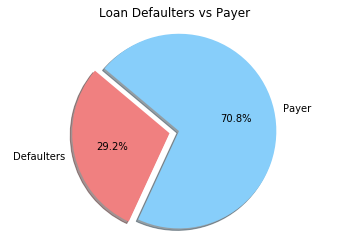

In [21]:
labels = 'Defaulters', 'Payer'
sizes = [df['Default'].sum(),804-df['Default'].sum()]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Loan Defaulters vs Payer')
plt.axis('equal')
plt.show()

In [22]:
Deafaulter['Emp_status'].sum()

87

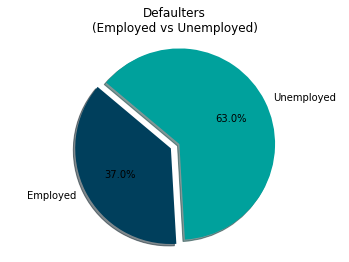

In [24]:
labels = 'Employed', 'Unemployed'
sizes = [87,235-87]
colors = ['#003f5c', '#00a19c']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Defaulters\n(Employed vs Unemployed)')
plt.axis('equal')
plt.show()

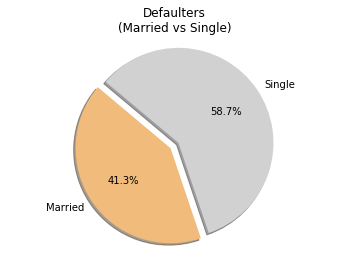

In [0]:
labels = 'Married', 'Single'
sizes = [Deafaulter['Marital_status'].sum(),235-Deafaulter['Marital_status'].sum()]
colors = ['#f1bb7c', '#d1d1d1']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Defaulters\n(Married vs Single)')
plt.axis('equal')
plt.show()

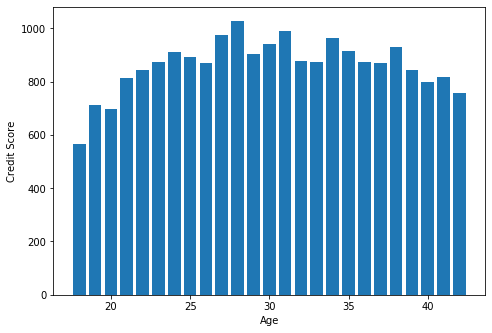

In [25]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(df['Age'],df['Credit_score'])
ax.set_ylabel('Credit Score')
ax.set_xlabel('Age')

plt.show()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


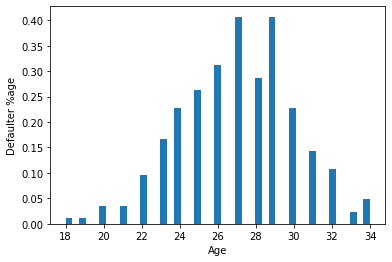

In [26]:
plt.hist(Deafaulter['Age'], normed=True, bins=45)
plt.ylabel('Defaulter %age')
plt.xlabel('Age')

plt.show()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


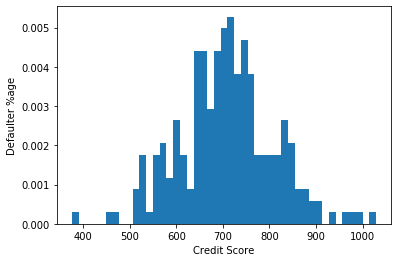

In [27]:
plt.hist(Deafaulter['Credit_score'], normed=True, bins=45)
plt.ylabel('Defaulter %age')
plt.xlabel('Credit Score')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


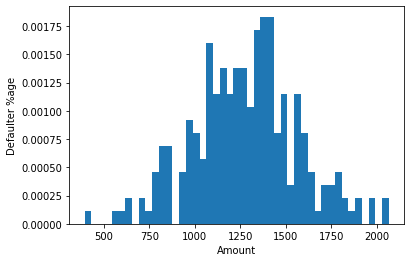

In [28]:
plt.hist(Deafaulter['Amount'], normed=True, bins=45)
plt.ylabel('Defaulter %age')
plt.xlabel('Amount')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


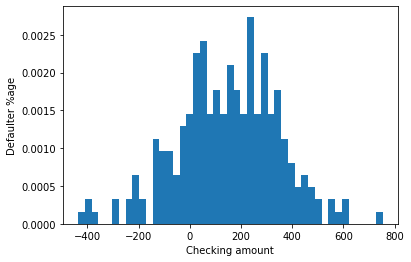

In [29]:
plt.hist(Deafaulter['Checking_amount'], normed=True, bins=45)
plt.ylabel('Defaulter %age')
plt.xlabel('Checking amount')
plt.show()

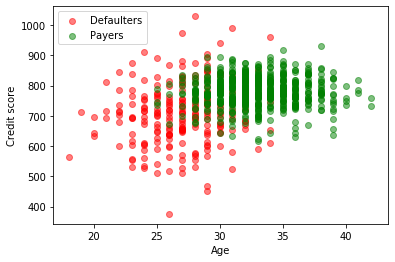

In [30]:
plt.scatter(Deafaulter['Age'] ,Deafaulter['Credit_score'],  c="r", alpha=0.5,label="Defaulters"
            )
plt.scatter(Good['Age'],Good['Credit_score'],color='g',alpha=0.5,label="Payers")
plt.xlabel("Age")
plt.ylabel("Credit score")
plt.legend(loc='upper left')
plt.show()

In [0]:
def_loan =pd.DataFrame(Deafaulter[['Car_loan','Home_loan','Education_loan']].sum(axis=0))

In [0]:
good_loan = pd.DataFrame(Good[['Car_loan','Home_loan','Education_loan']].sum(axis=0))

In [33]:
good_loan

,0
Car_loan,166
Home_loan,37
Education_loan,11


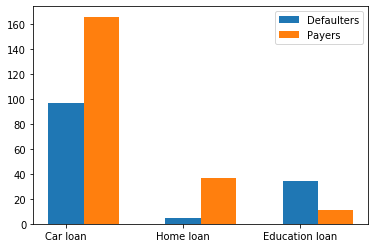

In [34]:
data1 = [97,5,34]
data2 = [166,37,11]
width =0.3
plt.bar(['Car loan','Home loan','Education loan'], data1, width=width)
plt.bar(np.arange(len(data2))+ width, data2, width=width)
plt.legend(['Defaulters','Payers'])
plt.show()